# Домашняя работа №2

In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

### Задание 1

Придумайте функции со свойствами __a), b), c), d)__. В данных вариантах  область определения __X__ любая, какая вам удобна. Главное - функция с нужными свойствами.

In [2]:
def print_func(f, left_bound, right_bound, samples_number):
    x = np.linspace(left_bound, right_bound, samples_number)
    y = np.array([f(x_i) for x_i in x])
    peaks, _ = find_peaks(-y)
    plt.plot(x, y)
    plt.plot(x[peaks], y[peaks], "x")

*__a) бесконечное количество локальных экстремумов__*

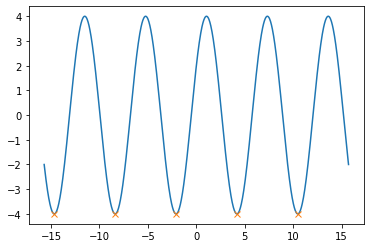

In [3]:
def f_1(x):
    return 4 * np.sin(x + np.pi / 6 )

print_func(f_1, -5*np.pi, 5*np.pi, 1000)


*__b) 2 локальных экстремума__*

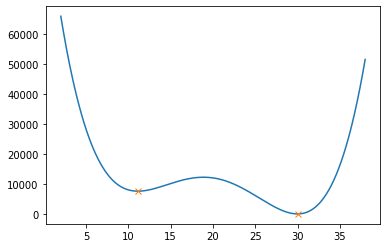

In [4]:
def f_2(x):
    return ((x - 10) ** 2 + 20) * ((x - 30) ** 2)

print_func(f_2, 2, 38, 1000)

*__с) 3 локальных экстремума__*

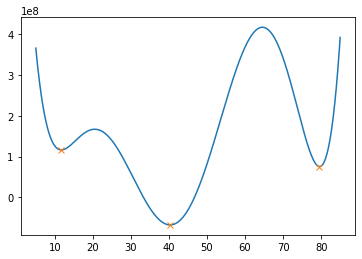

In [5]:
def f_3(x):
    return ((x - 10) ** 2 + 30) * ((x - 40) ** 2 - 45) * ((x - 80) ** 2 + 10)

print_func(f_3, 5, 85, 1000)

*__d) область определения функции - 1 точка__*

In [6]:
def f_4(x):
    return np.sqrt(- x ** 2)

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


$f'(x) = 2sin(2x+1)cos(2x+1)(2) = 2sin(4x+2)$

$f''(x) = 2cos(4x+2)(4) = 8cos(4x+2)$

### Задание 3
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

$f'_x(x, y) = 4xy^3 - 1/x^2 + y^2$

$f'_y(x, y) = 6x^2y^2 + 2yx$

$f'_x(1, 2) = 32 - 1 + 4 = 35$

$f'_y(1, 2) = 24 + 4 = 28$

$grad_f(1,2) = (35, 28)$

Проверка в **_numpy_**:

In [7]:
def f(x_k, c_k):
    return c_k[0] * x_k[0] ** 2 * x_k[1]**3 + c_k[1] / x_k[0] + c_k[2] * x_k[1] ** 2 * x_k[0] + c_k[3]

In [8]:
x_k = np.array([1,2])
c_k = (2, 1, 1, 7)
eps = np.sqrt(np.finfo(float).eps)
precision = np.full(2, eps)
approx_fprime(x_k, f, precision, c_k)

array([35.00000024, 28.00000024])

### Задание 4

Градиентный спуск своими руками.

**_Функция:_**

In [27]:
def f(x_k):
    return (x_k[0]**2) + (x_k[1]**2) 

*__Начальные значения:__*

In [49]:
x_0 = np.array([100, 200])
l_step = 0.1

*__Расчётный блок:__*

In [52]:
x_k = x_0
eps = np.sqrt(np.finfo(float).eps)
precision = np.full(2, eps)

for i in range(100):
    # Calculate gradient
    grad = approx_fprime(x_k, f, precision)
    
    # Update x with gradient
    x_k = x_k - l_step*grad

In [53]:
print("Минимум достигается в: ", x_k)
print("Значение функции в минимуме: ", f(x_k))

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15


Проверка с помощью встроенной функции scipy: 

In [59]:
minimize(f, [100,200], method='nelder-mead', options={'xtol': eps, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 84
         Function evaluations: 162


 final_simplex: (array([[ 3.31391559e-09, -1.82888492e-09],
       [-4.97134432e-09,  7.91645290e-09],
       [-7.00174057e-09, -1.06328083e-08]]), array([1.43268566e-17, 8.73844908e-17, 1.62080984e-16]))
           fun: 1.4326856592347756e-17
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 84
        status: 0
       success: True
             x: array([ 3.31391559e-09, -1.82888492e-09])